# **Introduction**

Feature Selection is the process of reducing the number of input variables when developing a predictive model. It is desirable to reduce the number of input variables to both reduce the computational cost of modeling and, in some cases, to improve the performance of the model.

- Dropping Constant Features- Variance Threshold
- Feature selection with correlation
- Features selection Using Information Gain For Classification
- Features selection Using Information Gain For Regression
- Feature Selection Using Chi2 Statistical Analysis 

# **Data Loading**

**Load data from google drive** 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
data = pd.read_csv("/content/drive/MyDrive/Datasets/Recommended System/Placement_Data_Full_Class.csv")

In [3]:
data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [ ]:
data.size

3225

# **Preprocessing**

In [4]:
data

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


**Check Missing Value**


In [5]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.head(4)

,Total,Percent
salary,67,0.311628
status,0,0.000000
mba_p,0,0.000000
specialisation,0,0.000000


In [6]:
missing_v = [col for col in data.columns if (data[col].isnull().sum()/data.shape[0]) * 100 > 0.001]
print(len(missing_v))
for cols in missing_v:
    del data[cols]

1


In [7]:
np.sum(data.isnull().any(axis=1))

0

**Hot Encoding**

In [8]:
data.select_dtypes(include=['object']).columns

Index(['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex',
       'specialisation', 'status'],
      dtype='object')

In [9]:
data['gender'] = data['gender'].fillna(data['gender'].mode()[0])
data['ssc_b'] = data['ssc_b'].fillna(data['ssc_b'].mode()[0])
data['hsc_b'] = data['hsc_b'].fillna(data['hsc_b'].mode()[0])
data['hsc_s'] = data['hsc_s'].fillna(data['hsc_s'].mode()[0])
data['degree_t'] = data['degree_t'].fillna(data['degree_t'].mode()[0])
data['workex'] = data['workex'].fillna(data['workex'].mode()[0])
data['specialisation'] = data['specialisation'].fillna(data['specialisation'].mode()[0])
data['status'] = data['status'].fillna(data['status'].mode()[0])




In [10]:
from sklearn.preprocessing import LabelEncoder
lencoders = {}
for col in data.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    data[col] = lencoders[col].fit_transform(data[col])

In [11]:
data

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,1,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1
1,2,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1
2,3,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1
3,4,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0
4,5,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,1,80.60,1,82.00,1,1,77.60,0,0,91.0,0,74.49,1
211,212,1,58.00,1,60.00,1,2,72.00,2,0,74.0,0,53.62,1
212,213,1,67.00,1,67.00,1,1,73.00,0,1,59.0,0,69.72,1
213,214,0,74.00,1,66.00,1,1,58.00,0,0,70.0,1,60.23,1


**Feature Scaling**

In [12]:
# Standardizing data
from sklearn import preprocessing
r_scaler = preprocessing.MinMaxScaler()
r_scaler.fit(data)
data = pd.DataFrame(r_scaler.transform(data), index=data.index, columns=data.columns)

**Data spliting**


In [19]:
from sklearn.model_selection import train_test_split

In [16]:
X=data.drop('specialisation',axis=1)


In [17]:
y=data[['specialisation']]


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)


# **Feature Selection**


## **1 — Dropping Constant Features- Variance Threshold**

Variance threshold is a function inside the Feature selector. Feature selector that removes all low-variance features. This feature selection algorithm looks only at the features (X), not the desired outputs (y), and can thus be used for unsupervised learning.

In [21]:
from sklearn.feature_selection import VarianceThreshold

Let's apply the variance threshold

In [22]:
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(X_train)

VarianceThreshold(threshold=0)

In the below code output you will be able to see two values(true and false), true indicates that a particular feature is very important, and false indicates that a particular feature is not so important with respect to the target feature.

In [23]:
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

There are a total of 284 non-constant features out of 370 features.


In [24]:
### lets find non constant feature
len(X_train.columns[var_thres.get_support()])

13

86 features are our constant features


In [25]:
constant_columns = [column for column in X_train.columns
                    if column not in X_train.columns[var_thres.get_support()]]

print(len(constant_columns))

0


Printing our constant columns


In [26]:
for column in constant_columns:
    print(column)

Here, we are dropping the constant columns


In [27]:
X_train.drop(constant_columns,axis=1)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,mba_p,status
210,0.981308,1.0,0.818594,1.0,0.741351,1.0,0.5,0.673171,0.0,0.0,0.854167,0.872564,1.0
190,0.887850,0.0,0.476397,1.0,0.546952,0.0,0.5,0.268293,0.0,0.0,0.000000,0.423163,0.0
177,0.827103,0.0,0.661925,0.0,0.988468,1.0,0.5,0.707317,0.0,1.0,0.812500,0.734633,1.0
1,0.004673,1.0,0.792414,0.0,0.680890,1.0,1.0,0.670244,1.0,1.0,0.760417,0.564843,1.0
198,0.925234,0.0,0.538240,0.0,0.543657,0.0,0.5,0.365854,0.5,0.0,0.791667,0.777736,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,0.406542,1.0,0.385694,0.0,0.230643,0.0,1.0,0.243902,0.5,0.0,0.520833,0.294978,0.0
103,0.481308,1.0,0.661925,0.0,0.675453,0.0,1.0,0.560976,1.0,1.0,0.729167,0.547976,1.0
67,0.313084,1.0,0.825191,1.0,0.683690,1.0,0.5,0.414634,0.0,0.0,0.389792,0.366567,1.0
24,0.112150,1.0,0.734075,1.0,1.000000,1.0,1.0,0.703902,1.0,0.0,0.987500,0.854573,1.0


## **2 — Feature selection with correlation**

In this technique, we compare two features together and if both features are highly co-related with each other then we will drop anyone features from both.

In [28]:
#importing libraries
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,0.000000,1.0,0.538240,1.0,0.889621,1.0,0.5,0.195122,1.0,0.0,0.104167,1.0,0.284483,1.0
1,0.004673,1.0,0.792414,0.0,0.680890,1.0,1.0,0.670244,1.0,1.0,0.760417,0.0,0.564843,1.0
2,0.009346,1.0,0.497011,0.0,0.510708,0.0,0.0,0.341463,0.0,0.0,0.520833,0.0,0.247001,1.0
3,0.014019,1.0,0.311482,0.0,0.247117,0.0,1.0,0.048780,1.0,0.0,0.333333,1.0,0.308096,0.0
4,0.018692,1.0,0.925788,0.0,0.602965,0.0,0.5,0.568293,0.0,0.0,0.975000,0.0,0.160795,1.0


We perform all the operations on the X_train dataset and after that perform the same for X_test.

Correlations-


In [32]:
X_train.corr()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,mba_p,status
sl_no,1.000000,0.084376,-0.024430,-0.030648,0.023241,0.090364,0.013984,-0.085807,-0.030024,0.093139,0.097305,0.097228,-0.014857
gender,0.084376,1.000000,-0.075719,-0.009164,0.023504,0.077426,0.057347,-0.190623,0.020692,0.027391,0.105560,-0.294345,0.044520
ssc_p,-0.024430,-0.075719,1.000000,0.129164,0.527413,0.068477,0.245003,0.495057,0.247380,0.129498,0.297208,0.373861,0.626159
ssc_b,-0.030648,-0.009164,0.129164,1.000000,-0.099320,0.574368,-0.005266,0.095484,0.098430,-0.032189,-0.013198,0.088443,0.107603
hsc_p,0.023241,0.023504,0.527413,-0.099320,1.000000,0.031687,-0.131533,0.423577,-0.061311,0.101938,0.238843,0.399975,0.485533
hsc_b,0.090364,0.077426,0.068477,0.574368,0.031687,1.000000,0.136666,0.053708,0.072778,0.085479,0.079226,0.109699,0.074762
hsc_s,0.013984,0.057347,0.245003,-0.005266,-0.131533,0.136666,1.000000,0.112416,0.585340,0.060490,0.136841,-0.006521,0.031795
degree_p,-0.085807,-0.190623,0.495057,0.095484,0.423577,0.053708,0.112416,1.000000,0.054031,0.128690,0.289640,0.424389,0.437374
degree_t,-0.030024,0.020692,0.247380,0.098430,-0.061311,0.072778,0.585340,0.054031,1.000000,0.119280,0.108527,0.123653,-0.026298
workex,0.093139,0.027391,0.129498,-0.032189,0.101938,0.085479,0.060490,0.128690,0.119280,1.000000,0.032180,0.176277,0.262014


You will be able to see tax and rad features both are 91% highly co-related with each other, so we will drop one of them.

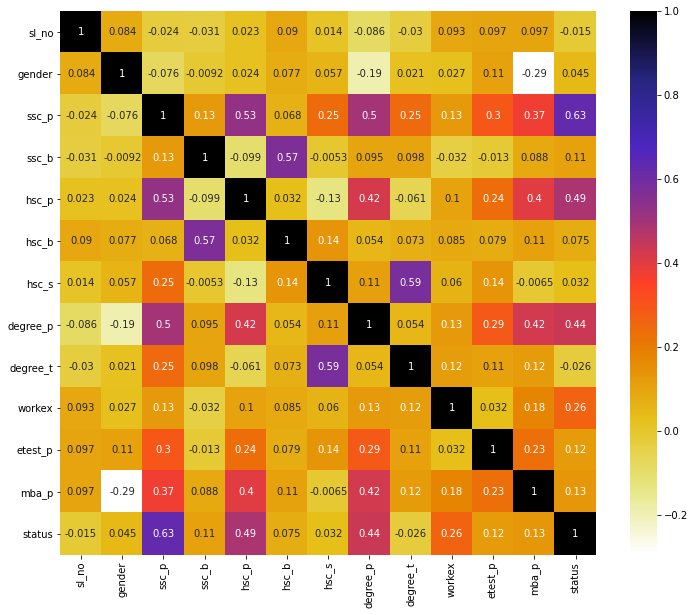

In [33]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

With the below function we can select highly correlated features. It will remove the first feature that is correlated with anything other feature.

In [34]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

Here we are calling our fn. and passing the dataset and threshold value.

In [35]:
corr_features = correlation(X_train, 0.7)
len(set(corr_features))

0

Highly co-related features


In [ ]:
corr_features


Drop highly co-related features


For both train and test dataset


In [ ]:
X_train.drop(corr_features,axis=1)
X_test.drop(corr_features,axis=1)

## **3- Boruta Feature selection**

In [ ]:
!pip install boruta


In [39]:
from boruta import BorutaPy
from sklearn.ensemble import RandomForestRegressor
import numpy as np

In [40]:
forest = RandomForestRegressor(n_jobs=-1,max_depth=5)


In [41]:
boruta= BorutaPy(estimator= forest, n_estimators='auto',max_iter=100)
boruta.fit(np.array(X),np.array(y) )

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)
/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)
/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)
/

BorutaPy(alpha=0.05,
         estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                         criterion='mse', max_depth=5,
                                         max_features='auto',
                                         max_leaf_nodes=None, max_samples=None,
                                         min_impurity_decrease=0.0,
                                         min_impurity_split=None,
                                         min_samples_leaf=1,
                                         min_samples_split=2,
                                         min_weight_fraction_leaf=0.0,
                                         n_estimators=56, n_jobs=-1,
                                         oob_score=False,
                                         random_state=RandomState(MT19937) at 0x7EFBEB300050,
                                         verbose=0, warm_start=False),
         max_iter=100, n_estimators='auto', perc=100,
         random_stat

In [42]:
green_area= X.columns[boruta.support_].to_list()
blue_area= X.columns[boruta.support_weak_].to_list()

In [43]:
print('Feature in green ara:',green_area)
print('Feature in blue ara:',blue_area)

Feature in green ara: ['degree_p', 'etest_p']
Feature in blue ara: ['hsc_p']


## **4----Entropy**

In [45]:
#Calculating Features Importance
def Calculating_Entropy(Labels):
    Calculating_Entropy=0
    labelCounts = Counter(Labels)
    for label in labelCounts:
        probability_of_label = labelCounts[label] / len(Labels)
        Calculating_Entropy -= probability_of_label * math.log2(probability_of_label)
    return Calculating_Entropy

In [46]:
def Calculating_Information_Gain(str_labels, split_labels):
    Calculating_Information_Gain = Calculating_Entropy(str_labels)
    for branch_subset in split_labels:
        Calculating_Information_Gain -= len(branch_subset) * Calculating_Entropy(branch_subset) / len(str_labels)
    return Calculating_Information_Gain

In [47]:
def data_split_for_label(dataset, column):
    data_split = []
    col_vals = data[column].unique() 
    for col_val in col_vals:
        data_split.append(dataset[dataset[column] == col_val])
    return(data_split)

In [ ]:
from collections import Counter
import math
IN_gain=[]
Feature_Names=[]
def Results_of_Information_Gain(dataset):
    b_gain = 0
    b_feature = 0
    features = list(data.columns)
    features.remove('specialisation')
    for feature in features:
        data_split = data_split_for_label(data, feature)
        labels_split = [dataframe['specialisation'] for dataframe in data_split]
        gain = Calculating_Information_Gain(dataset['specialisation'], labels_split)
        print(' \n')
        print('-------------------------------------------------------------------------------------------------')
        print('-------------------------------------------------------------------------------------------------')
        print(feature)
        print(gain)
        IN_gain.append(gain)
        Feature_Names.append(feature)
        print('-------------------------------------------------------------------------------------------------')
        print('-------------------------------------------------------------------------------------------------')
        if gain > b_gain:
            b_gain, b_feature = gain, feature
    return b_feature, b_gain

new_data = data_split_for_label(data, Results_of_Information_Gain(data)[0])

In [49]:
IG=pd.DataFrame()
IG['Features Importance']=IN_gain
IG['Features Importance']=round(IG['Features Importance'],2)
IG['Feature']=Feature_Names
IG=IG.sort_values(by=['Features Importance'], ascending=False)

In [50]:
Features_Group = IG[IG['Features Importance'] > 0.1] 

In [51]:
print('Length of group features', len(Features_Group))

Length of group features 6


In [52]:
print('Selected Features in group:\n\n', Features_Group['Feature'])

Selected Features in group:

 0        sl_no
11       mba_p
4        hsc_p
10     etest_p
2        ssc_p
7     degree_p
Name: Feature, dtype: object


In [53]:
Group_Features_Data=data[list(Features_Group['Feature'])]

In [54]:
Group_Features_Data

,sl_no,mba_p,hsc_p,etest_p,ssc_p,degree_p
0,0.000000,0.284483,0.889621,0.104167,0.538240,0.195122
1,0.004673,0.564843,0.680890,0.760417,0.792414,0.670244
2,0.009346,0.247001,0.510708,0.520833,0.497011,0.341463
3,0.014019,0.308096,0.247117,0.333333,0.311482,0.048780
4,0.018692,0.160795,0.602965,0.975000,0.925788,0.568293
...,...,...,...,...,...,...
210,0.981308,0.872564,0.741351,0.854167,0.818594,0.673171
211,0.985981,0.090330,0.378913,0.500000,0.352711,0.536585
212,0.990654,0.693778,0.494234,0.187500,0.538240,0.560976
213,0.995327,0.338081,0.477759,0.416667,0.682540,0.195122


## **5- ExtraTreesRegressor**

In [55]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score as acc

In [56]:
reg= ExtraTreesRegressor()


In [57]:
reg.fit(X_train,y_train)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [58]:
reg.feature_importances_


array([0.07699165, 0.0293418 , 0.0844988 , 0.05288942, 0.08352577,
       0.0473666 , 0.06290685, 0.12653859, 0.06038839, 0.0475845 ,
       0.17848508, 0.10296371, 0.04651884])

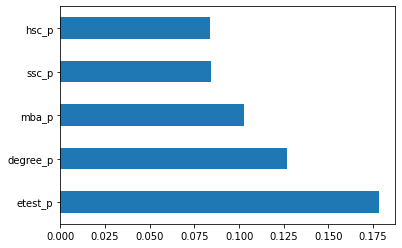

In [59]:
feat_importances = pd.Series(reg.feature_importances_, index=X_train.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

## **6 — Features selection Using Information Gain For Classification**

To understand this technique you need to have some statistical test knowledge like ANOVA test, t-test, chi-square test, p-value test.

**Mutual Information**


MI Estimate mutual information for a discrete target variable.
Mutual information (MI) between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.
The function relies on nonparametric methods based on entropy estimation from k-nearest neighbors distances.

In short
A quantity called mutual information measures the amount of information one can obtain from one random variable given another.
The mutual information between two random variables X and Y can be stated formally as follows:
I(X; Y) = H(X) — H(X | Y) Where I(X; Y) is the mutual information for X and Y, H(X) is the entropy for X and H(X | Y) is the conditional entropy for X given Y. The result has units of bits.

**Import dataset**


In [62]:
import pandas as pd
df=pd.read_csv('https://gist.githubusercontent.com/tijptjik/9408623/raw/b237fa5848349a14a14e5d4107dc7897c21951f5/wine.csv')
df.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


**Checking how much unique values we have**


In [63]:
df['Wine'].unique()

array([1, 2, 3])

**Check the datatype of features**


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wine                  178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic.acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Acl                   178 non-null    float64
 5   Mg                    178 non-null    int64  
 6   Phenols               178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid.phenols  178 non-null    float64
 9   Proanth               178 non-null    float64
 10  Color.int             178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD                    178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


**Train test split**


In [65]:
### Train test split to avoid overfitting
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop(labels=['Wine'], axis=1),
    df['Wine'],
    test_size=0.3,
    random_state=0)

**X_train.head**

In [66]:
X_train.head()

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
22,13.71,1.86,2.36,16.6,101,2.61,2.88,0.27,1.69,3.80,1.11,4.00,1035
108,12.22,1.29,1.94,19.0,92,2.36,2.04,0.39,2.08,2.70,0.86,3.02,312
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
145,13.16,3.57,2.15,21.0,102,1.50,0.55,0.43,1.30,4.00,0.60,1.68,830
71,13.86,1.51,2.67,25.0,86,2.95,2.86,0.21,1.87,3.38,1.36,3.16,410


Note- Remove all the null values from the train and test dataset before applying mutual_info_classify.

A high value for any feature means that a particular feature is the best feature.

In [67]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.42098176, 0.30039584, 0.17516609, 0.26843333, 0.19528061,
       0.48260015, 0.71462948, 0.1175939 , 0.27529979, 0.61606739,
       0.56116403, 0.54666629, 0.53016593])

Converting the information of features into series


In [68]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

Flavanoids              0.714629
Color.int               0.616067
Hue                     0.561164
OD                      0.546666
Proline                 0.530166
Phenols                 0.482600
Alcohol                 0.420982
Malic.acid              0.300396
Proanth                 0.275300
Acl                     0.268433
Mg                      0.195281
Ash                     0.175166
Nonflavanoid.phenols    0.117594
dtype: float64

Let’s plot the ordered mutual_info values per feature


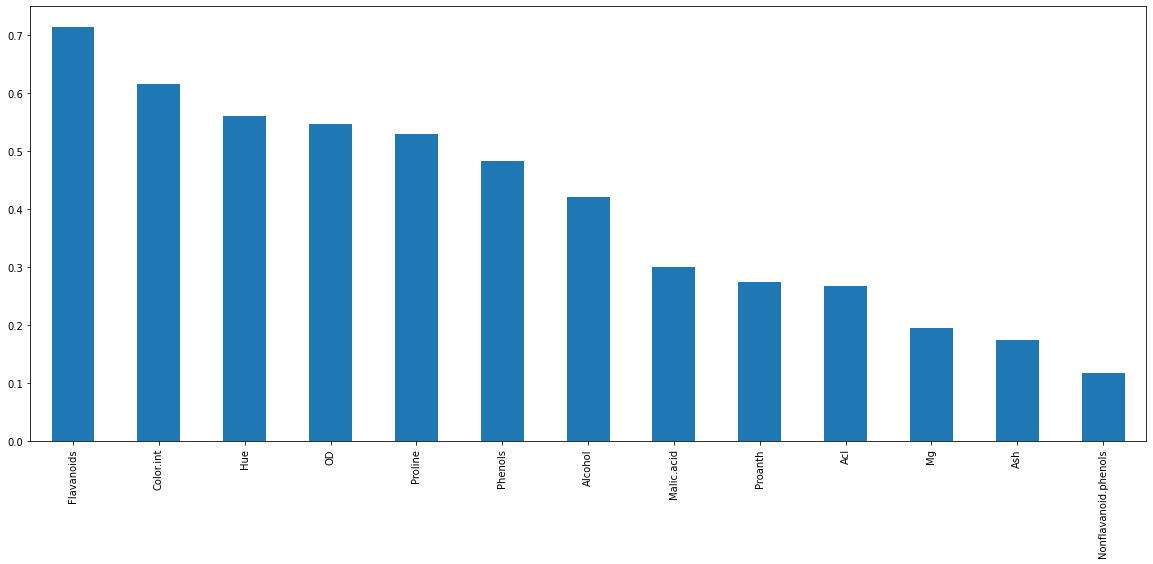

In [69]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))


Import selectkbest function to pick top features


In [70]:
from sklearn.feature_selection import SelectKBest

We will take only the top 5 features as our independent features

In [71]:
#No we Will select the  top 5 important features
sel_five_cols = SelectKBest(mutual_info_classif, k=5)
sel_five_cols.fit(X_train, y_train)
X_train.columns[sel_five_cols.get_support()]

Index(['Flavanoids', 'Color.int', 'Hue', 'OD', 'Proline'], dtype='object')

## **7 — Features selection Using Information Gain For Regression**

**Mutual Information**


Estimate mutual information for a continuous target variable.
Mutual information (MI) between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.
The function relies on nonparametric methods based on entropy estimation from k-nearest neighbors distances
Mutual information is calculated between two variables and measures the reduction in uncertainty for one variable given a known value of the other variable.

In short
A quantity called mutual information measures the amount of information one can obtain from one random variable given another.
The mutual information between two random variables X and Y can be stated formally as follows:
I(X; Y) = H(X) — H(X | Y) Where I(X; Y) is the mutual information for X and Y, H(X) is the entropy for X and H(X | Y) is the conditional entropy for X given Y. The result has units of bits.
Here we are trying to find out the best features based on the specific sales price. And ales price is a continuous target variable.

In [72]:
import pandas as pd
housing_df=pd.read_csv('/content/drive/MyDrive/Datasets/house prince_train.csv')

In [ ]:
housing_df.head()

In [ ]:
housing_df.info()

Check null values


In [ ]:
housing_df.isnull().sum()

**Taking only numerical variables to apply mutual information**

In [77]:
numeric_lst=['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_cols = list(housing_df.select_dtypes(include=numeric_lst).columns)

We have to find out mutual information with respect to each and every feature along with sales price

Numericals Columns


In [ ]:
numerical_cols

Creating a data frame for all the numerical_cols

In [79]:
housing_df=housing_df[numerical_cols]

In [81]:
housing_df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


Remove ID column


In [82]:
housing_df=housing_df.drop("Id",axis=1)


In [83]:
#Train and Test Split
### It is always a good practice to split train and test data to avoid
#overfitting
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(housing_df.drop(labels=['SalePrice'], axis=1),
    housing_df['SalePrice'],
    test_size=0.3,
    random_state=0)

In [ ]:
X_train

Check null values


In [ ]:
X_train.isnull().sum()

Applying mutual_info_regressionand filling null values with zero

The higher the value you get for any feature, the better it is and more dependent on to target feature.

In [86]:
from sklearn.feature_selection import mutual_info_regression
# determine the mutual information
mutual_info = mutual_info_regression(X_train.fillna(0), y_train)
mutual_info

array([0.2491294 , 0.21069317, 0.16694223, 0.53286437, 0.09848452,
       0.34950411, 0.25422466, 0.10522903, 0.16412815, 0.00825104,
       0.11565111, 0.38312062, 0.31260064, 0.22296479, 0.        ,
       0.48319691, 0.03544364, 0.        , 0.26410915, 0.08236791,
       0.04441535, 0.01748042, 0.18046341, 0.18192815, 0.27065734,
       0.39004003, 0.3682535 , 0.07795326, 0.16963796, 0.01877224,
       0.00187608, 0.01619159, 0.        , 0.        , 0.        ,
       0.00592684])

Mutual information (MI) [1] between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency. As the value near to one the more dependent that particular feature is.

Converting all the values into series


In [87]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

OverallQual      0.532864
GrLivArea        0.483197
GarageCars       0.390040
TotalBsmtSF      0.383121
GarageArea       0.368253
YearBuilt        0.349504
1stFlrSF         0.312601
GarageYrBlt      0.270657
FullBath         0.264109
YearRemodAdd     0.254225
MSSubClass       0.249129
2ndFlrSF         0.222965
LotFrontage      0.210693
Fireplaces       0.181928
TotRmsAbvGrd     0.180463
OpenPorchSF      0.169638
LotArea          0.166942
BsmtFinSF1       0.164128
BsmtUnfSF        0.115651
MasVnrArea       0.105229
OverallCond      0.098485
HalfBath         0.082368
WoodDeckSF       0.077953
BedroomAbvGr     0.044415
BsmtFullBath     0.035444
EnclosedPorch    0.018772
KitchenAbvGr     0.017480
ScreenPorch      0.016192
BsmtFinSF2       0.008251
YrSold           0.005927
3SsnPorch        0.001876
LowQualFinSF     0.000000
MoSold           0.000000
PoolArea         0.000000
MiscVal          0.000000
BsmtHalfBath     0.000000
dtype: float64

Plot the bar graph for mutual info


In [ ]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))

Import SelectPercentile to choose top columns


In [89]:
from sklearn.feature_selection import SelectPercentile

We will choose only top percentile features. SelectPercentile helps us to choose the top feature out of all the features.

In [90]:
#Selecting the top 20 percentile
selected_top_columns = SelectPercentile(mutual_info_regression, percentile=20)
selected_top_columns.fit(X_train.fillna(0), y_train)


SelectPercentile(percentile=20,
                 score_func=<function mutual_info_regression at 0x7efbc5d40b00>)

Here, false means that a particular feature is not belonging to the top 20 percentile.

In [91]:
selected_top_columns.get_support()

array([False, False, False,  True, False,  True, False, False, False,
       False, False,  True,  True, False, False,  True, False, False,
       False, False, False, False, False, False, False,  True,  True,
       False, False, False, False, False, False, False, False, False])

Getting top most important feature


In [92]:
X_train.columns[selected_top_columns.get_support()]

Index(['OverallQual', 'YearBuilt', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea',
       'GarageCars', 'GarageArea'],
      dtype='object')

## **8 — Feature Selection Using Chi2 Statistical Analysis**

**Fisher Score- Chisquare Test For Feature Selection**

Compute chi-squared stats between each non-negative feature and class.
This score should be used to evaluate categorical variables in a classification task. This score can be used to select the n_features features with the highest values for the test chi-squared statistic from X, which must contain only non-negative features such as booleans or frequencies (e.g., term counts in document classification), relative to the classes.
Recall that the chi-square test measures dependence between stochastic variables, so using this function “weeds out” the features that are the most likely to be independent of class and therefore irrelevant for classification. The Chi-Square statistic is commonly used for testing relationships between categorical variables.
It compares the observed distribution of the different classes of target Y among the different categories of the feature, against the expected distribution of the target classes, regardless of the feature categories.

**Import Dataset-**


In [93]:
import seaborn as sns
df=sns.load_dataset('titanic')
import numpy as np

Top 10 columns


In [ ]:
df.head(10)

Information

In [ ]:
df.info()

So, I am considering categorical features and will try to find out the top important features. Creating a data frame for categorical features. We need to compare all the categories with the output category (Survived).

In [96]:
##['sex','embarked','alone','pclass','Survived']
df=df[['sex','embarked','alone','pclass','survived']]
df.head()

,sex,embarked,alone,pclass,survived
0,male,S,False,3,0
1,female,C,False,1,1
2,female,S,True,3,1
3,female,S,False,1,1
4,male,S,True,3,0


Let’s perform label encoding on the embarked


In [97]:
df['sex']=np.where(df['sex']=="male",1,0)
df.head()

,sex,embarked,alone,pclass,survived
0,1,S,False,3,0
1,0,C,False,1,1
2,0,S,True,3,1
3,0,S,False,1,1
4,1,S,True,3,0


In [ ]:
#Let’s perform label encoding on the embarked


In [98]:
import numpy as np
### let's perform label encoding on embarked
ordinal_label = {k: i for i, k in enumerate(df['embarked'].unique(), 0)}
df['embarked'] = df['embarked'].map(ordinal_label)

In [99]:
df.head()

,sex,embarked,alone,pclass,survived
0,1,0,False,3,0
1,0,1,False,1,1
2,0,0,True,3,1
3,0,0,False,1,1
4,1,0,True,3,0


In [100]:
#Performing label encoding on alone
## let's perform label encoding on alone
df['alone']=np.where(df['alone']==True,1,0)

In [ ]:
df.head()

Train Test split


In [102]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df[['sex','embarked','alone','pclass']],
                                              df['survived'],test_size=0.3,random_state=100)

Check unique values for the sex column


In [103]:
X_train['sex'].unique()

array([1, 0])

Check null values


In [104]:
X_train.isnull().sum()

sex         0
embarked    0
alone       0
pclass      0
dtype: int64

**Perform chi2 test**


In [105]:
# Perform chi2 test
### chi2 returns 2 values
### Fscore and the pvalue
from sklearn.feature_selection import chi2
f_p_values=chi2(X_train,y_train)


Chi2 gives us two values-
F-score — fscore needs to be higher, the more the value of fscore the more important feature is
P-value — lesser the pvalue the more important the feature is
1st array values are of fscore
2nd array values are of pvalue

In [106]:
f_p_values

(array([65.67929505,  7.55053653, 10.88471585, 21.97994154]),
 array([5.30603805e-16, 5.99922095e-03, 9.69610546e-04, 2.75514881e-06]))

Make a series of these p_values


In [107]:
import pandas as pd
p_values=pd.Series(f_p_values[1])
p_values.index=X_train.columns
p_values

sex         5.306038e-16
embarked    5.999221e-03
alone       9.696105e-04
pclass      2.755149e-06
dtype: float64

Sort the series in ascending order


In [108]:
p_values.sort_index(ascending=False)

sex         5.306038e-16
pclass      2.755149e-06
embarked    5.999221e-03
alone       9.696105e-04
dtype: float64

Observation
Sex Column is the most important column when compared to the output feature Survived.

**References**

[Feature Selection Techniques](https://medium.com/geekculture/feature-selection-techniques-bc0c69e85b85)